# We want to see whether the intensity statistics varies along different views slice-to-slice (2D)

In [1]:
cd ../smore

/home/remedios/smore/smore


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from skimage.metrics import peak_signal_noise_ratio
import numpy as np
import nibabel as nib
from pathlib import Path
import matplotlib.pyplot as plt
from utils.plot import *
import pandas as pd
import seaborn as sns

In [4]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['font.size'] = 18
plt.rcParams['image.cmap'] = 'Greys_r'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['image.interpolation'] = 'nearest'

In [5]:
sr_dir = Path("/home/remedios/data/results/smoreCE/SUPERRES-ADNIPHANTOM_20200711_PHANTOM-T2-TSE-2D-CORONAL-PRE-ACQ1-04mm_resampled/")
sr_files = sorted(sr_dir.iterdir())

In [6]:
sr_files = sorted(filter(lambda x: "with" in x.name and 
                         "espreso" in x.name and 
                         "FBA" not in x.name and
                         "step" in x.name, sr_files))

In [7]:
sr_files

[PosixPath('/home/remedios/data/results/smoreCE/SUPERRES-ADNIPHANTOM_20200711_PHANTOM-T2-TSE-2D-CORONAL-PRE-ACQ1-04mm_resampled/ADNI4x_64chunks_step-014300_EDSR_smoreCE-with-val_espreso_filters=256_ps=32_layers=66.nii'),
 PosixPath('/home/remedios/data/results/smoreCE/SUPERRES-ADNIPHANTOM_20200711_PHANTOM-T2-TSE-2D-CORONAL-PRE-ACQ1-04mm_resampled/ADNI4x_64chunks_step-014300_valid_smoreCE-with-val_espreso_filters=256_ps=64_layers=16.nii'),
 PosixPath('/home/remedios/data/results/smoreCE/SUPERRES-ADNIPHANTOM_20200711_PHANTOM-T2-TSE-2D-CORONAL-PRE-ACQ1-04mm_resampled/ADNI4x_fullslice_step-014300_EDSR_smoreCE-with-val_espreso_filters=256_ps=32_layers=66.nii'),
 PosixPath('/home/remedios/data/results/smoreCE/SUPERRES-ADNIPHANTOM_20200711_PHANTOM-T2-TSE-2D-CORONAL-PRE-ACQ1-04mm_resampled/ADNI4x_fullslice_step-014300_valid_smoreCE-with-val_espreso_filters=256_ps=64_layers=16.nii')]

In [8]:
sr = nib.load(sr_files[1]).get_fdata(dtype=np.float32)

In [9]:
sr.shape

(256, 256, 180)

In [13]:
center_vol_plot(sr)

In [18]:
def get_stats(x):
#     print(f"Mean: {x.mean():.2f}")
#     print(f"Std: {x.std():.2f}")
#     print(f"Min: {x.min():.2f}")
#     print(f"Max: {x.max():.2f}")
    
    return x.mean(), x.std(), x.min(), x.max()

In [21]:
stats_dict = {k:{metric: [] for metric in ['mean', 'std', 'min', 'max']} 
              for k in ['axi', 'sag', 'cor']}


In [22]:
for i in range(sr.shape[0]):
    mean, std, min_, max_ = get_stats(sr[i, :, :])
    stats_dict['axi']['mean'].append(mean)
    stats_dict['axi']['std'].append(std)
    stats_dict['axi']['min'].append(min_)
    stats_dict['axi']['max'].append(max_)
    
for i in range(sr.shape[1]):
    mean, std, min_, max_ = get_stats(sr[:, i, :])
    stats_dict['sag']['mean'].append(mean)
    stats_dict['sag']['std'].append(std)
    stats_dict['sag']['min'].append(min_)
    stats_dict['sag']['max'].append(max_)
    
for i in range(sr.shape[2]):
    mean, std, min_, max_ = get_stats(sr[:, :, i])
    stats_dict['cor']['mean'].append(mean)
    stats_dict['cor']['std'].append(std)
    stats_dict['cor']['min'].append(min_)
    stats_dict['cor']['max'].append(max_)

In [38]:
len(list(
    np.pad(np.array(stats_dict['cor']['std']), (38, 38))
    ))

256

In [36]:
(256 - 180)

76

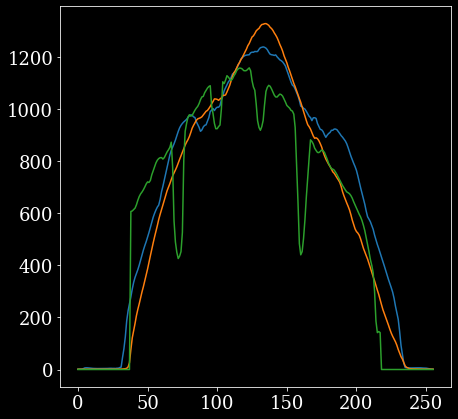

In [39]:
plt.plot(stats_dict['axi']['std'])
plt.plot(stats_dict['sag']['std'])
# pad out with zeros to center the statistics curves
plt.plot(list(
    np.pad(np.array(stats_dict['cor']['std']), (38, 38))
    ))
plt.show()

In [27]:
plt.plot(stats_dict['axi']['mean'])
plt.plot(stats_dict['sag']['mean'])
plt.plot(stats_dict['cor']['mean'])
plt.show()

# On average, how different are through-plane and in-plane stds and means?

In [41]:
stds = [
    stats_dict['axi']['std'],
    stats_dict['sag']['std'],
    stats_dict['cor']['std'],
]

list(map(lambda x: np.array(x).mean(), stds))

[662.1006, 607.68896, 831.808]

In [46]:
831.808 - 607.68896

224.11904000000004

In [48]:
from utils.augmentations import get_intensity_shift, apply_intensity_shift

In [80]:
apply_intensity_shift(np.zeros((5, 5)), 10)

array([[1.79286113, 1.79286113, 1.79286113, 1.79286113, 1.79286113],
       [1.79286113, 1.79286113, 1.79286113, 1.79286113, 1.79286113],
       [1.79286113, 1.79286113, 1.79286113, 1.79286113, 1.79286113],
       [1.79286113, 1.79286113, 1.79286113, 1.79286113, 1.79286113],
       [1.79286113, 1.79286113, 1.79286113, 1.79286113, 1.79286113]])

In [85]:
np.random.random?

In [81]:
sr2 = apply_intensity_shift(sr, get_intensity_shift(sr))

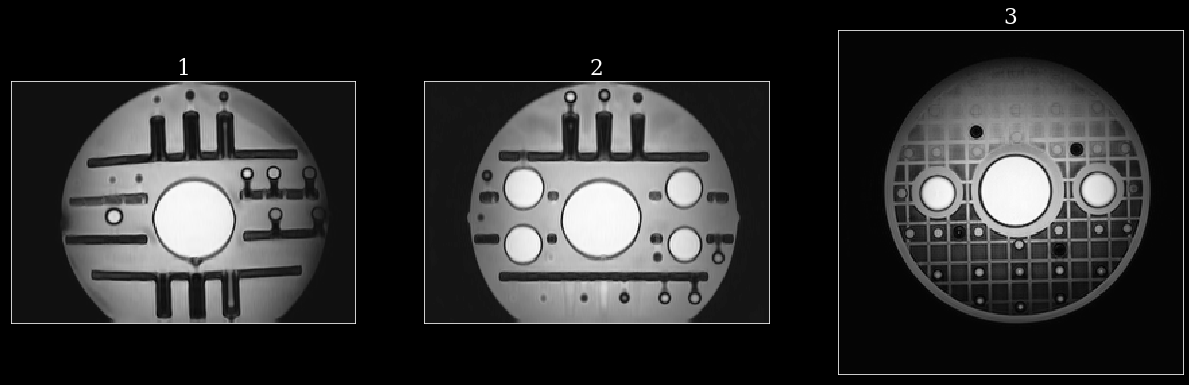

In [82]:
center_vol_plot(sr2)

In [83]:
sr2.mean()

542.7738

In [84]:
sr.mean()

523.1085

In [47]:
get_intensity_shift(sr)

224.11902

In [42]:
means = [
    stats_dict['axi']['mean'],
    stats_dict['sag']['mean'],
    stats_dict['cor']['mean'],
]

list(map(lambda x: np.array(x).mean(), means))

[523.1083, 523.1083, 523.1083]